In [7]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [11]:
sales=pd.read_csv("BigMart_Train.csv")

In [59]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [13]:
sales.shape

(8523, 12)

In [15]:
len(sales.columns)

12

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# REMOVE MISSING VALUES

In [17]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
sales["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [26]:
sales["Item_Fat_Content"]=sales["Item_Fat_Content"].replace('reg','Regular')

In [33]:
sales["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [35]:
sales["Item_Weight"].mean()

12.857645184136183

In [36]:
sales["Item_Weight"].fillna(sales["Item_Weight"].mean(),inplace=True)

In [37]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
mode_of_outlet_size=sales["Outlet_Size"].mode()

In [39]:
mode_of_outlet_size

0    Medium
Name: Outlet_Size, dtype: object

In [41]:
sales["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [43]:
#outlet size depend on outlet type
mode_of_outlet_size_new = sales.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x: x.mode()[0]))

In [44]:
mode_of_outlet_size_new

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [46]:
sales["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [47]:
miss_values = sales['Outlet_Size'].isnull()

In [48]:
miss_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [49]:
sales.loc[miss_values, 'Outlet_Size'] = sales.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size_new[x])

In [50]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# REMOVE OUTLIERS

In [51]:
column_names=["Item_Weight","Item_Visibility","Item_MRP"]

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


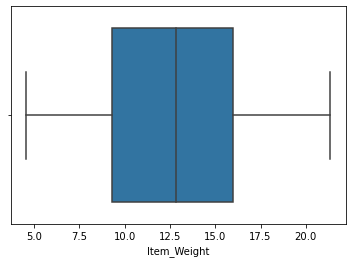

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


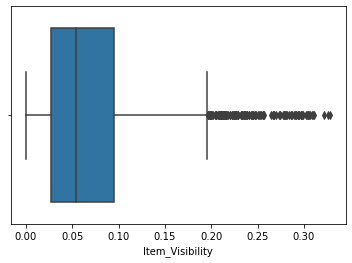

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


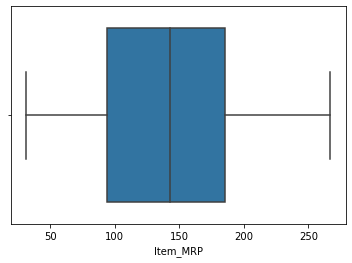

In [52]:
for i in column_names:
     sns.boxplot(sales[i])
     plt.show()

In [53]:
Q1=sales["Item_Visibility"].quantile(0.25)
Q3=sales["Item_Visibility"].quantile(0.75)

In [54]:
IQR=Q3-Q1
IQR

0.067595815

In [55]:
out_rows=((sales["Item_Visibility"]<(Q1-1.5*IQR))  | (sales["Item_Visibility"]>(Q3+1.5*IQR))).values

In [56]:
out_rows

array([False, False, False, ..., False, False, False])

In [57]:
sales_new=sales[~out_rows]

In [58]:
sales_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


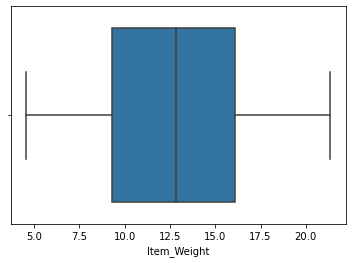

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


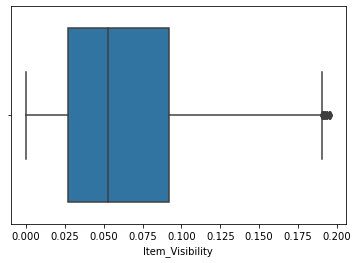

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


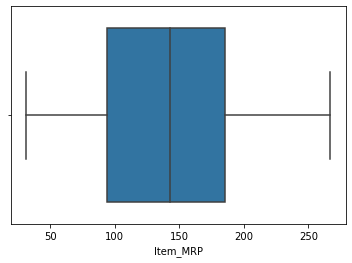

In [60]:
for i in column_names:
     sns.boxplot(sales_new[i])
     plt.show()

# ANALYSING THE DATA

In [61]:
sales_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000
mean,12.864794,0.063061,140.968471,1997.948443,2212.891704
std,4.242004,0.046130,62.272255,8.352477,1703.559375
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.026789,93.794900,1987.000000,874.861200
50%,12.857645,0.052729,142.915400,1999.000000,1830.950000
75%,16.100000,0.092277,185.625300,2004.000000,3124.599400
max,21.350000,0.195721,266.888400,2009.000000,13086.964800


In [62]:
sns.set()

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


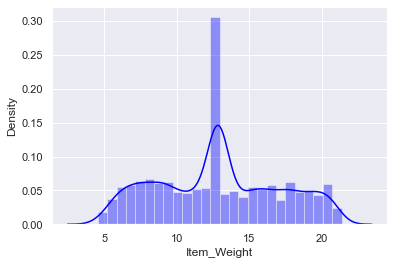

In [63]:
sns.distplot(sales_new['Item_Weight'], color='blue')
plt.show()

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


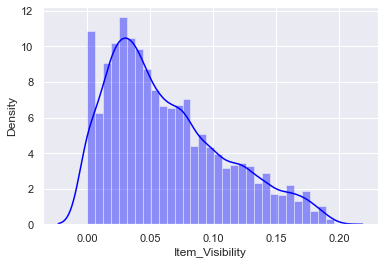

In [64]:
sns.distplot(sales_new['Item_Visibility'], color='blue')
plt.show()#positive skewed()

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


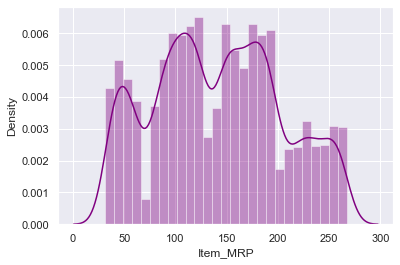

In [65]:
sns.distplot(sales_new['Item_MRP'], color='purple')
plt.show()#Material requirements planning(materials and components needed to manufacture a product)
#mostly lies on 50,100,200

C:\Users\Chenali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


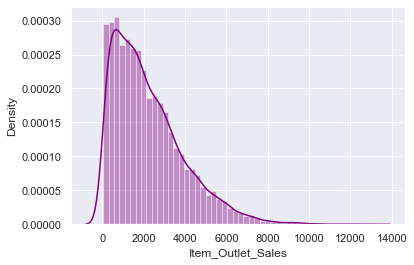

In [66]:
sns.distplot(sales_new['Item_Outlet_Sales'], color='purple')
plt.show()#positive skewed

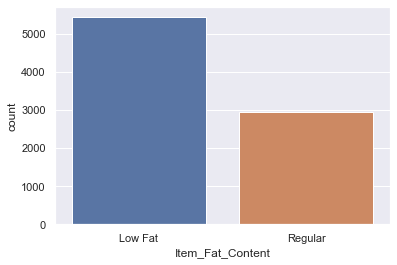

In [67]:
sns.countplot(x='Item_Fat_Content', data=sales_new)
plt.show()

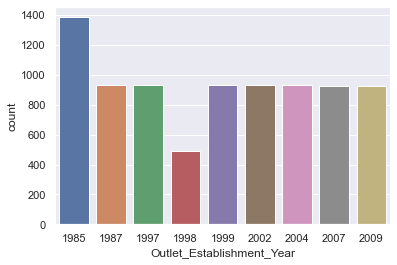

In [68]:
sns.countplot(x='Outlet_Establishment_Year', data=sales_new)
plt.show()

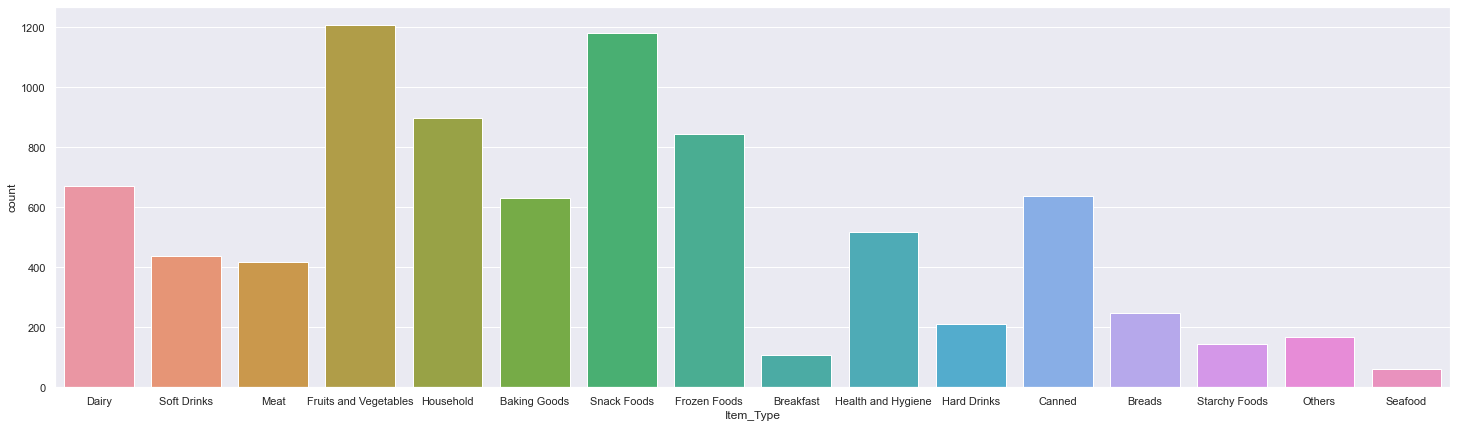

In [69]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=sales_new)
plt.show()

In [70]:
encoder = LabelEncoder()

In [71]:
sales_new['Item_Identifier'] = encoder.fit_transform(sales_new['Item_Identifier'])

sales_new['Item_Fat_Content'] = encoder.fit_transform(sales_new['Item_Fat_Content'])

sales_new['Item_Type'] = encoder.fit_transform(sales_new['Item_Type'])

sales_new['Outlet_Identifier'] = encoder.fit_transform(sales_new['Outlet_Identifier'])

sales_new['Outlet_Size'] = encoder.fit_transform(sales_new['Outlet_Size'])

sales_new['Outlet_Location_Type'] = encoder.fit_transform(sales_new['Outlet_Location_Type'])

sales_new['Outlet_Type'] = encoder.fit_transform(sales_new['Outlet_Type'])

C:\Users\Chenali\AppData\Local\Temp\ipykernel_16172\1045878691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_new['Item_Identifier'] = encoder.fit_transform(sales_new['Item_Identifier'])
C:\Users\Chenali\AppData\Local\Temp\ipykernel_16172\1045878691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_new['Item_Fat_Content'] = encoder.fit_transform(sales_new['Item_Fat_Content'])
C:\Users\Chenali\AppData\Local\Temp\ipykernel_16172\1045878691.py:5: SettingWithCopyWarning: 
A value is trying to

In [72]:
sales_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [74]:
sales_new.to_csv('after_preprocess.csv')